#Import Liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import copy

#Load Data

In [2]:
#make a copy of data and applying the operations on it.
df2 = pd.read_csv("CarPrice_Assignment.csv")
df = copy.deepcopy(df2)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#EDA

In [3]:
#Overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
#Showing us how many feature are objcet or string so we can apply encoding on them.
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [5]:
#Shape of data
df.shape

(205, 26)

In [6]:
#use describe method to give us some info about numeric data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
#Display all the feature columns
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [8]:
#Check if there are null values in the dataset
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<Axes: >

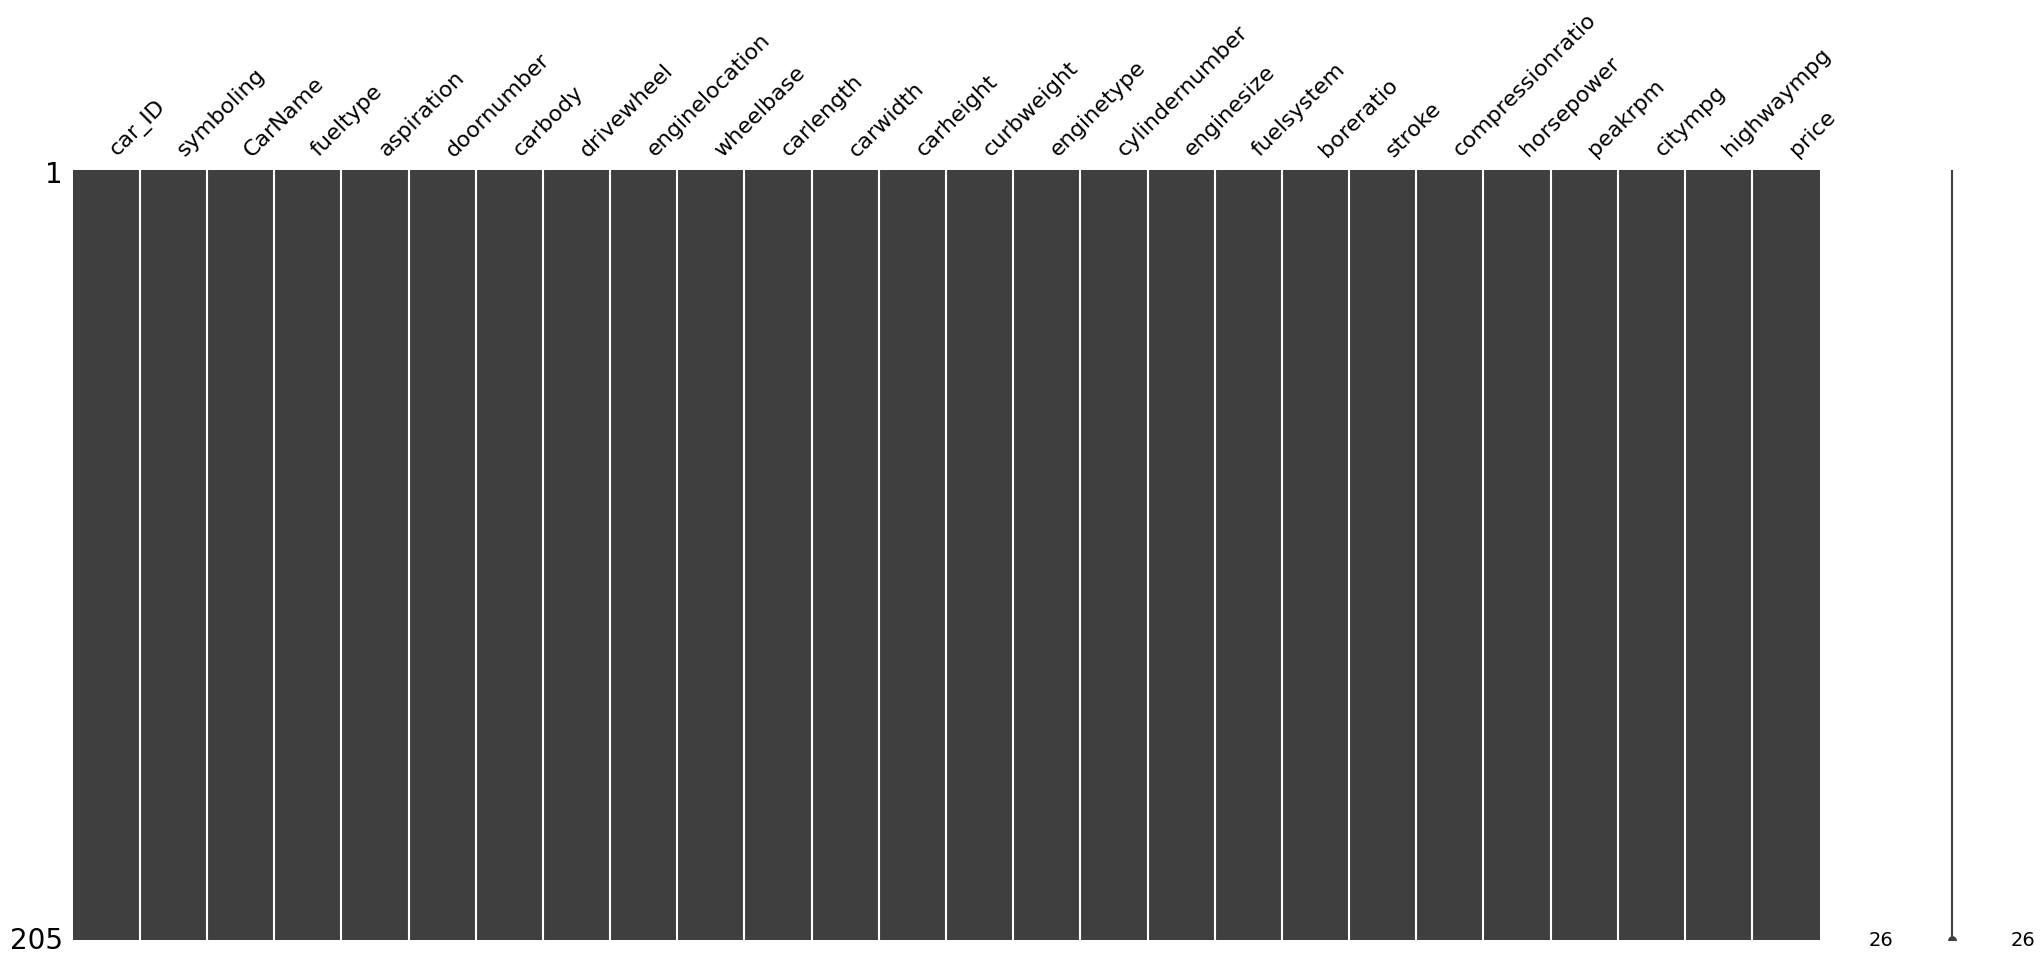

In [9]:
#Check null values via visualization
from missingno import matrix
matrix(df)

In [10]:
#Check if there are duplicated rows or data
df.duplicated().sum()

0

In [11]:
#Get rid of unnecessary colum
df.drop(['car_ID'],axis=1,inplace=True)
df.head(2)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [12]:
#Check for the unique values in the categorical columns to facilite the encoding process
print(f"fueltype : {df['fueltype'].unique()}")
print(f"aspiration : {df['aspiration'].unique()}")
print(f"doornumber : {df['doornumber'].unique()}")
print(f"carbody : {df['carbody'].unique()}")
print(f"drivewheel : {df['drivewheel'].unique()}")
print(f"enginelocation : {df['enginelocation'].unique()}")
print(f"enginetype : {df['enginetype'].unique()}")
print(f"cylindernumber : {df['cylindernumber'].unique()}")
print(f"fuelsystem : {df['fuelsystem'].unique()}")

fueltype : ['gas' 'diesel']
aspiration : ['std' 'turbo']
doornumber : ['two' 'four']
carbody : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drivewheel : ['rwd' 'fwd' '4wd']
enginelocation : ['front' 'rear']
enginetype : ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
cylindernumber : ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
fuelsystem : ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [13]:
#Converting CarName column to companyname column
CompanyName = df['CarName'].apply(lambda x:x.split(' ')[0])
df.insert(2,'CompanyName',CompanyName)
df.head()

,symboling,CarName,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
#Get the names of the categorical columns in one list
cat_col = []
for i in df.select_dtypes(include=['object']):
  cat_col.append(i)

print(cat_col)


['CarName', 'CompanyName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


In [16]:
for i in cat_col[0:1]:
  cat_col.pop(0)

print(cat_col)

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']


#Visualization

###Visualising Categorical Data

In [17]:
#controling size and style of the text
font = {
    'family':'serif',
    'color':'black',
    'weight':'heavy',
    'size': 16
}

"""
Using barplot for all the categorical columns to describe the relation bewteen
different features and the average of car prices.


"""

def barplot(col,df):
  plt.figure(figsize=(30,40))
  num = 1
  while num <= len(col):
    for i in col:
      sns.set_style(style='whitegrid')
      plt.subplot(10,2,num)
      sns.barplot(df,x=i,y='price')
      plt.xlabel(i.upper(),fontdict=font)
      plt.ylabel('Car price'.upper(),fontdict=font)
      num+=1



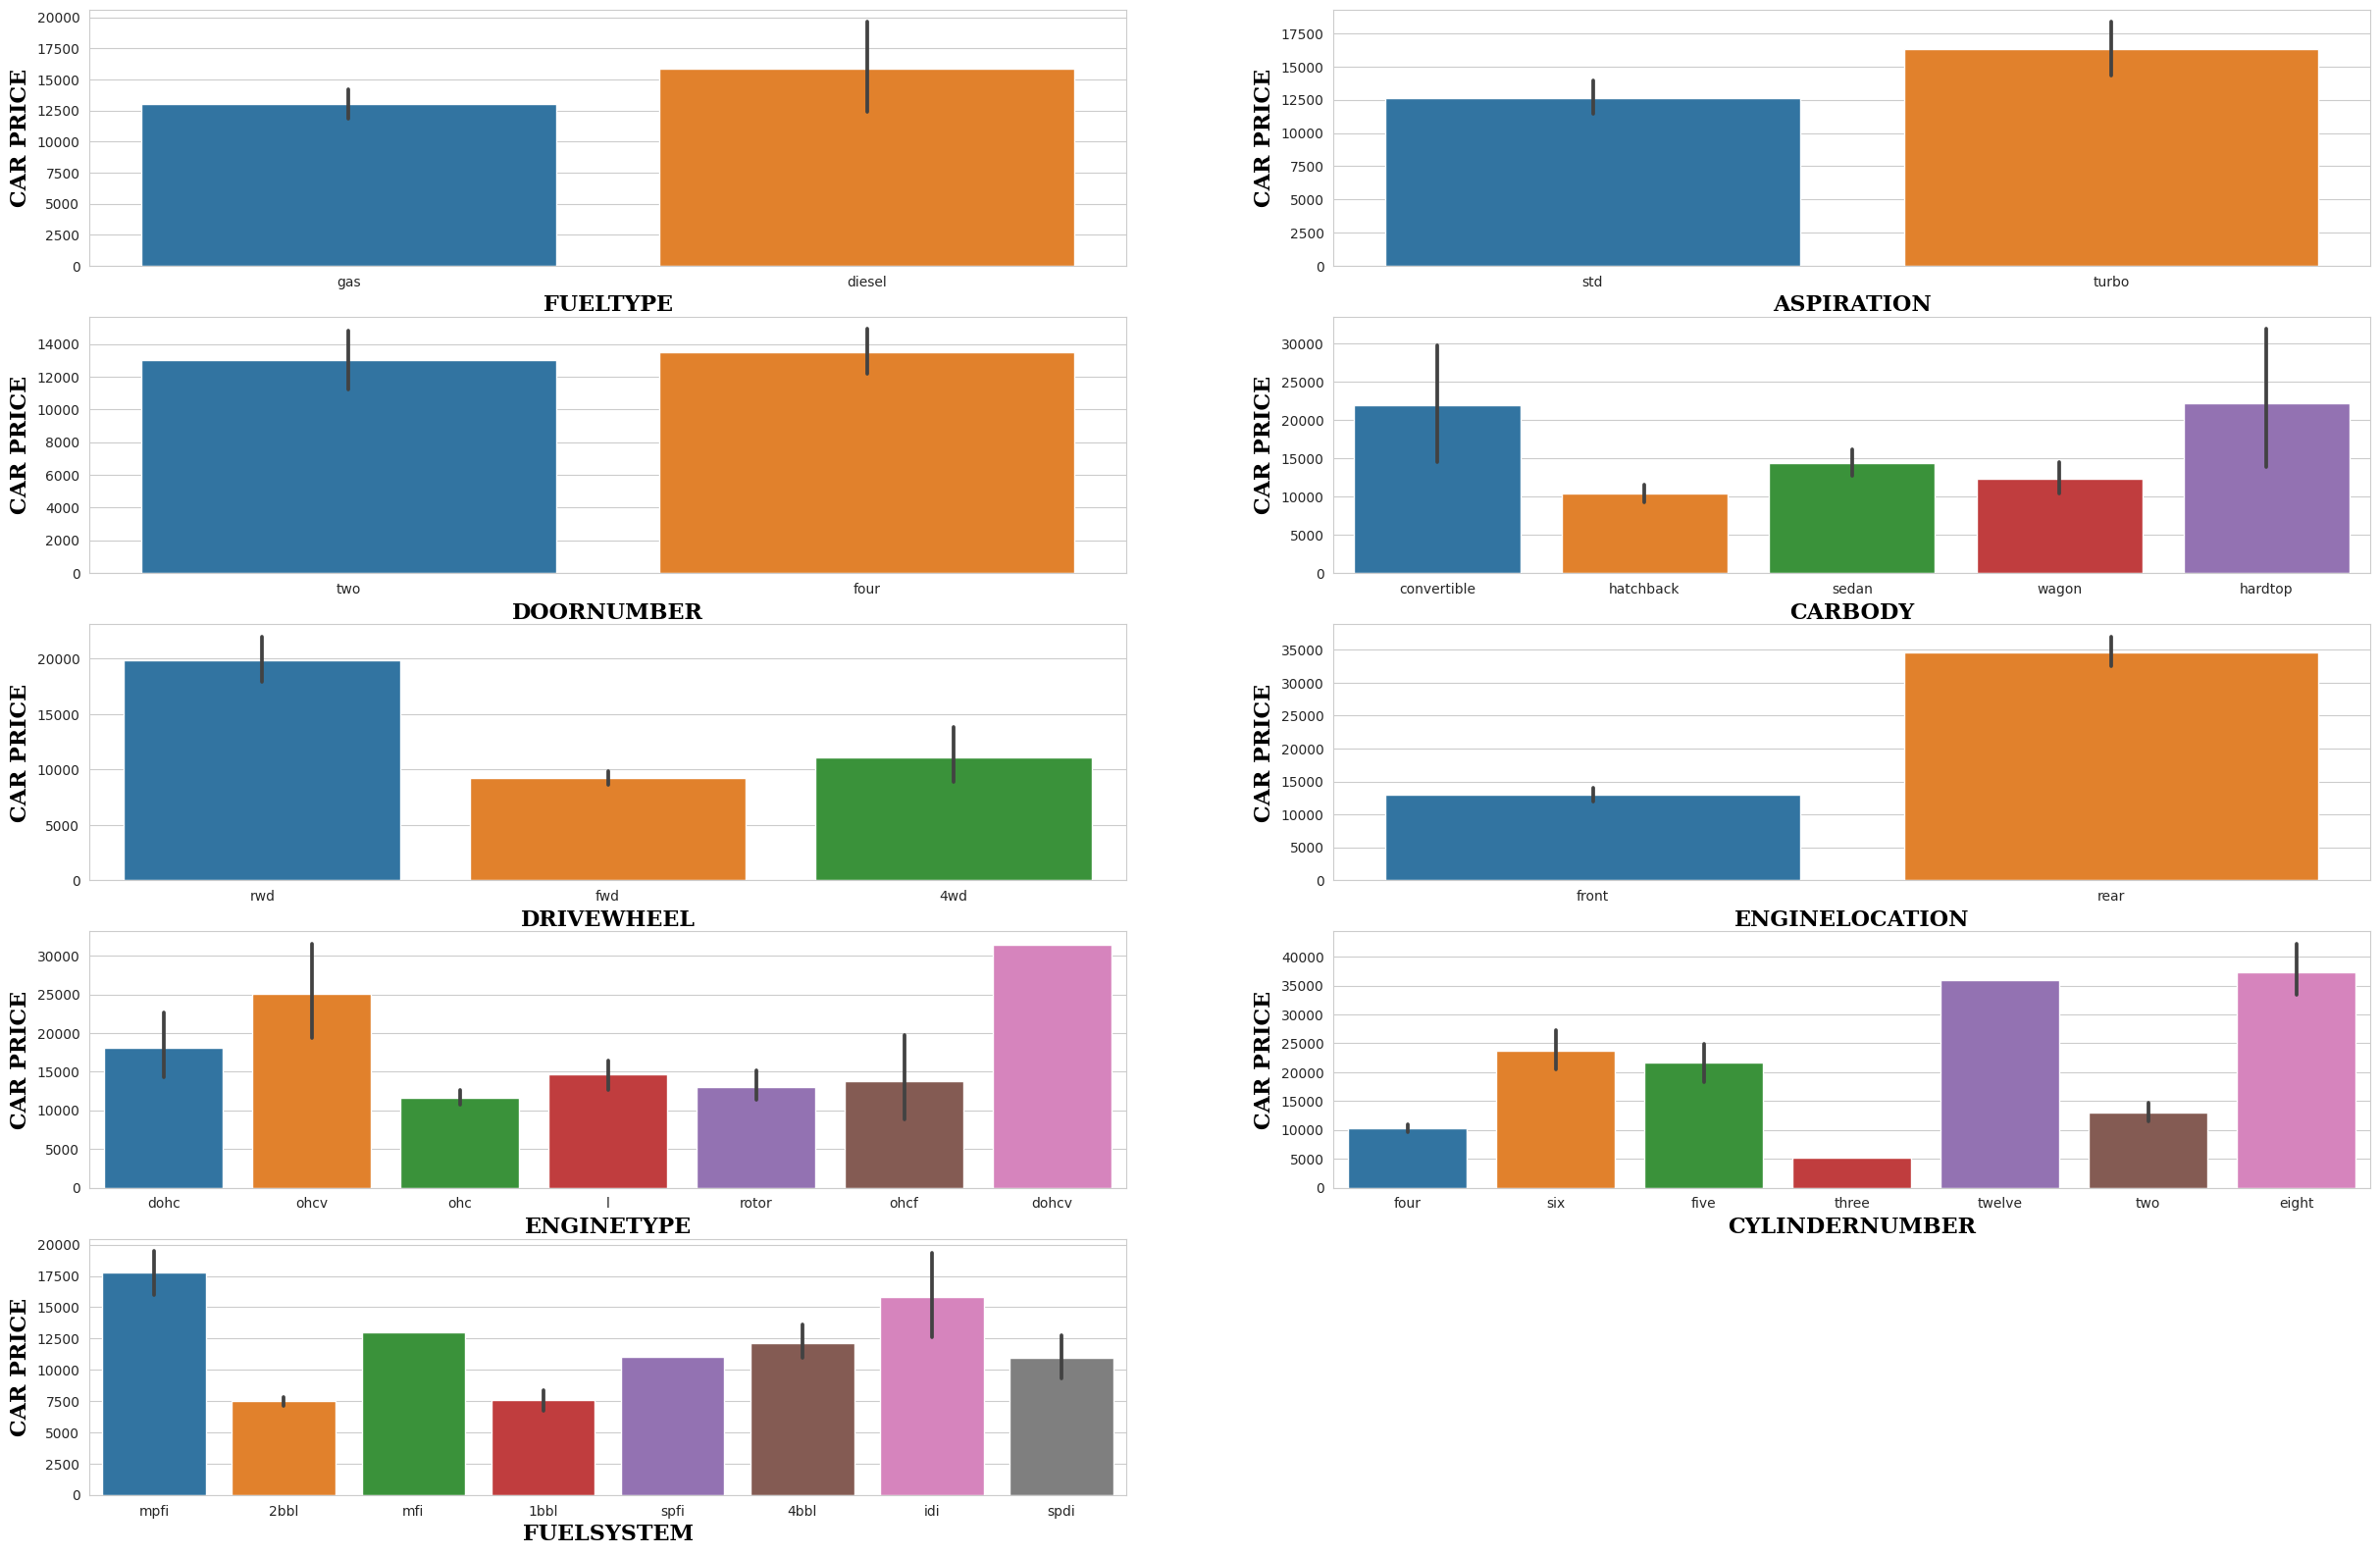

In [18]:
barplot(cat_col,df)

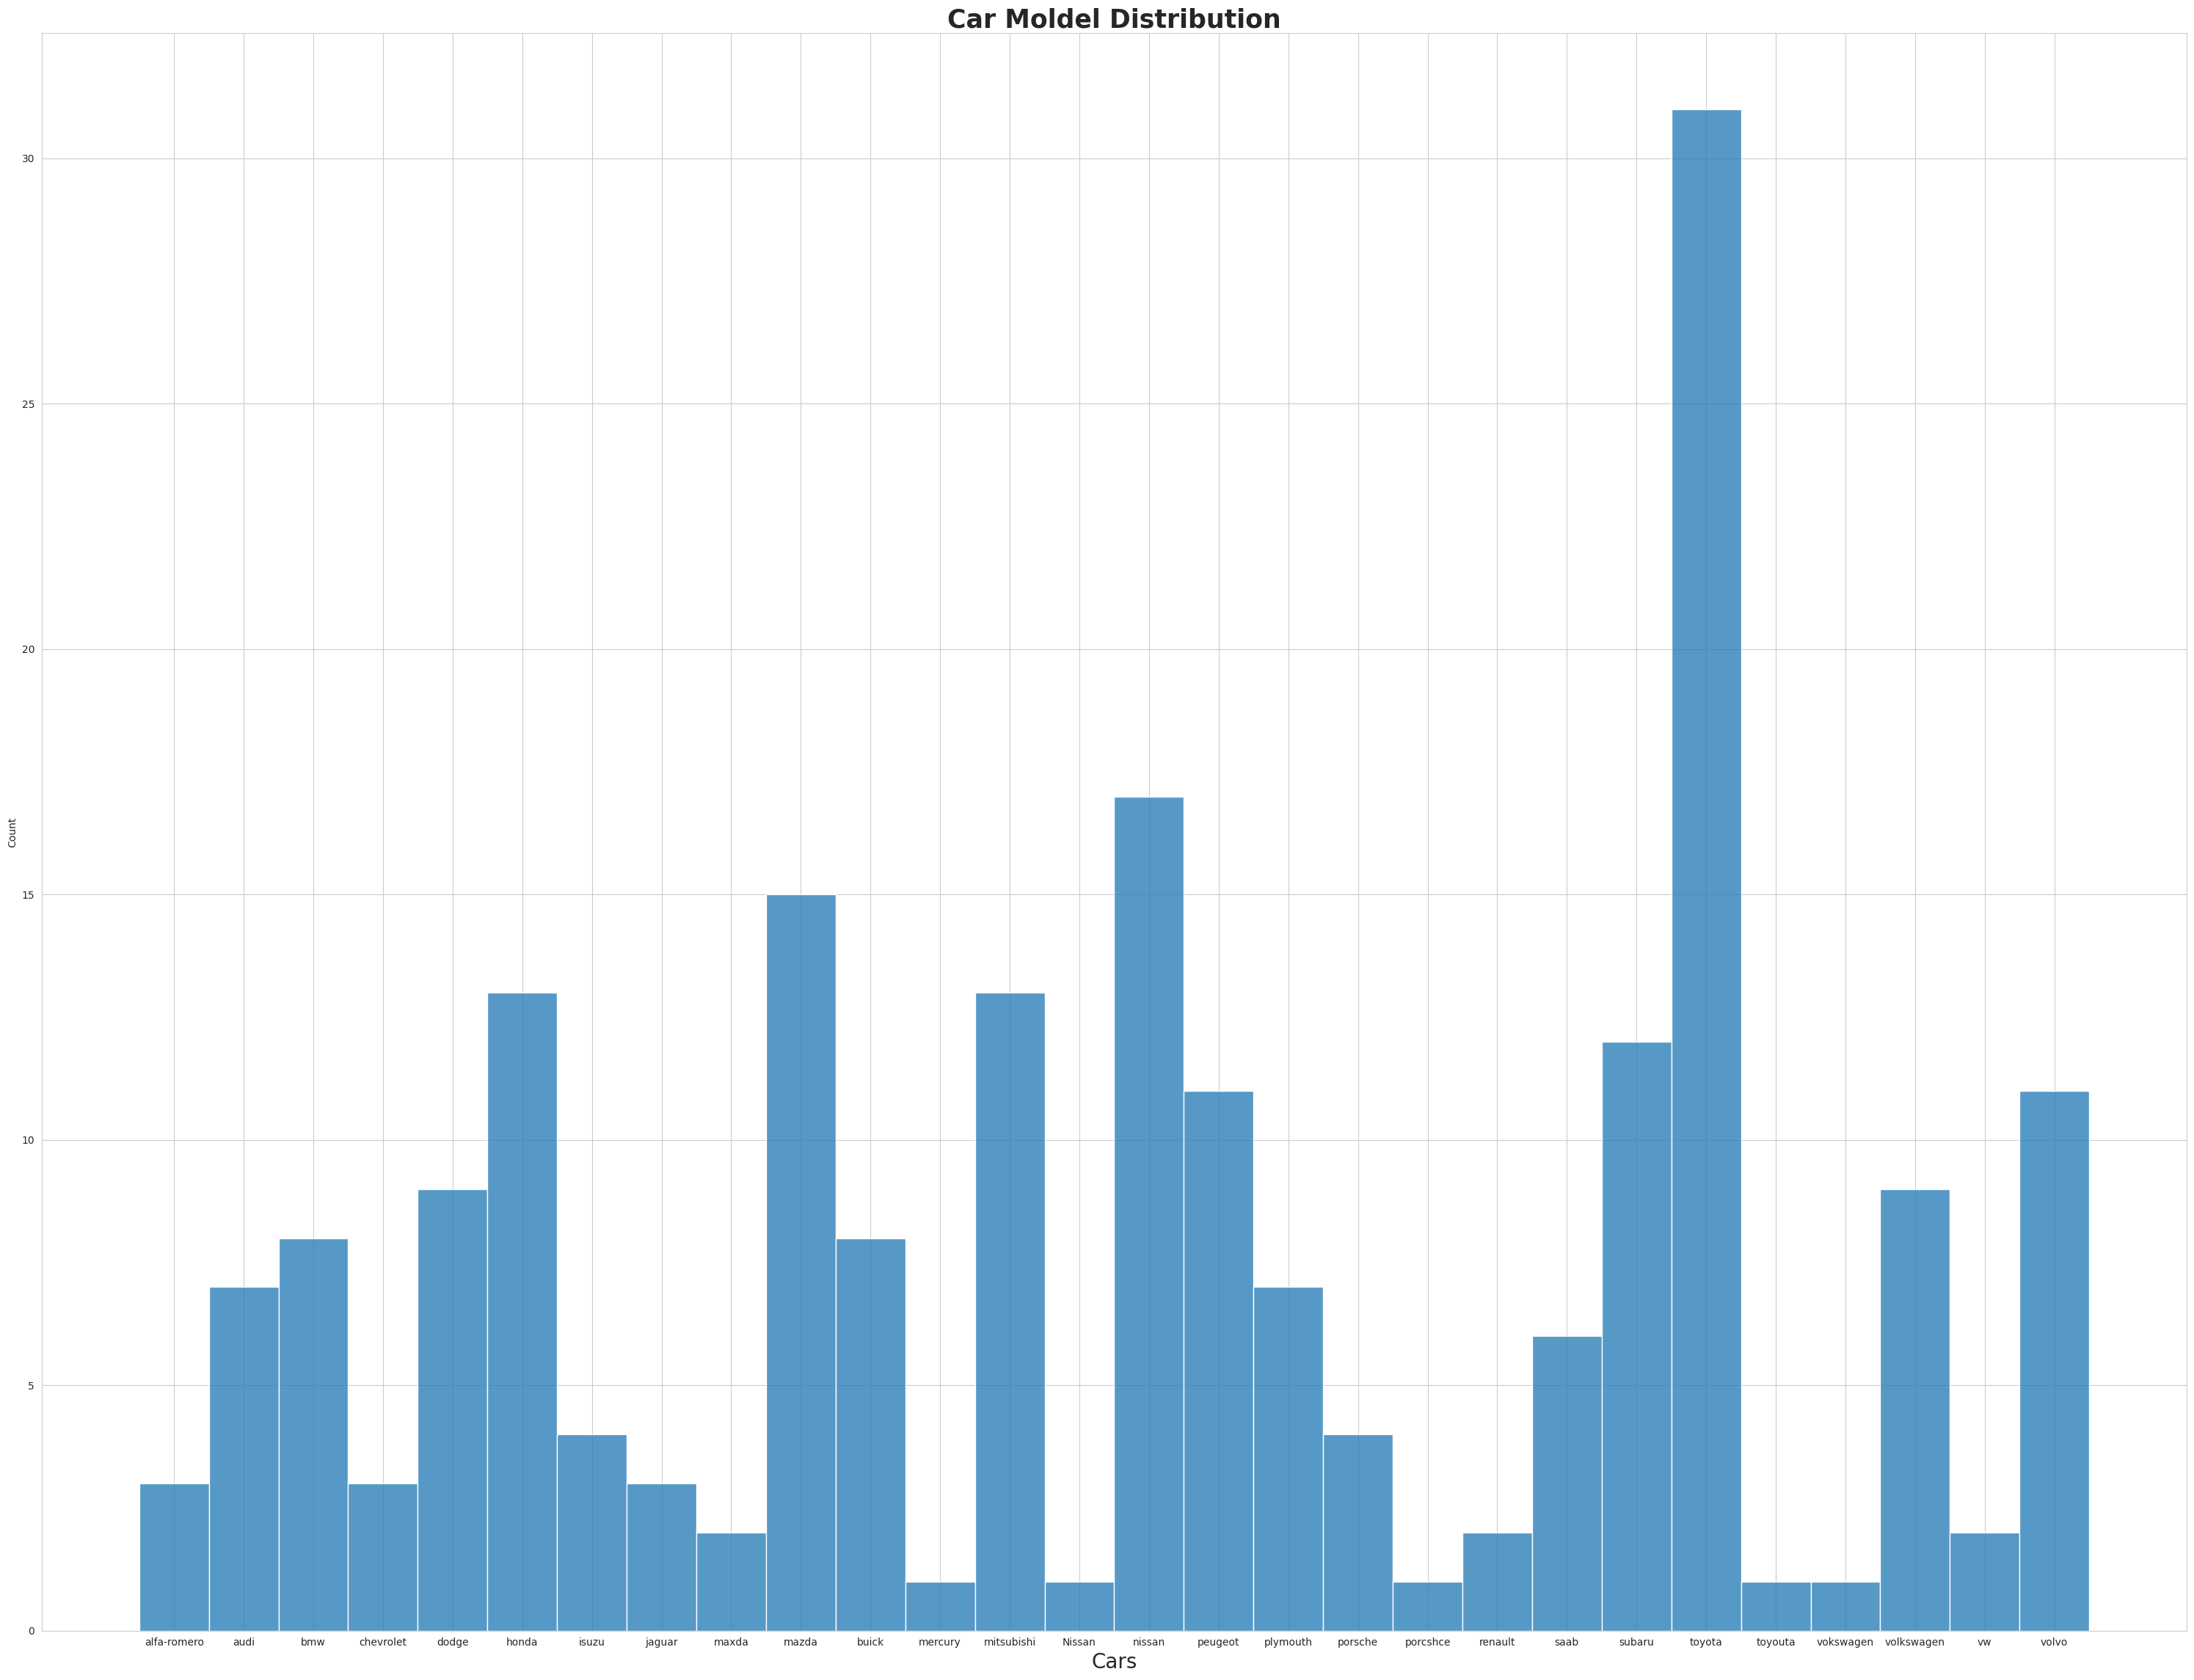

In [19]:
#Distrubiotn of the car models
plt.figure(figsize=(30,23))
sns.histplot(x=df['CompanyName'],bins=30,binwidth=0.3)
plt.title('Car Moldel Distribution',fontdict={'weight':'heavy','size':25})
plt.xlabel('Cars',fontdict={'size':20})
plt.tight_layout()
plt.show()


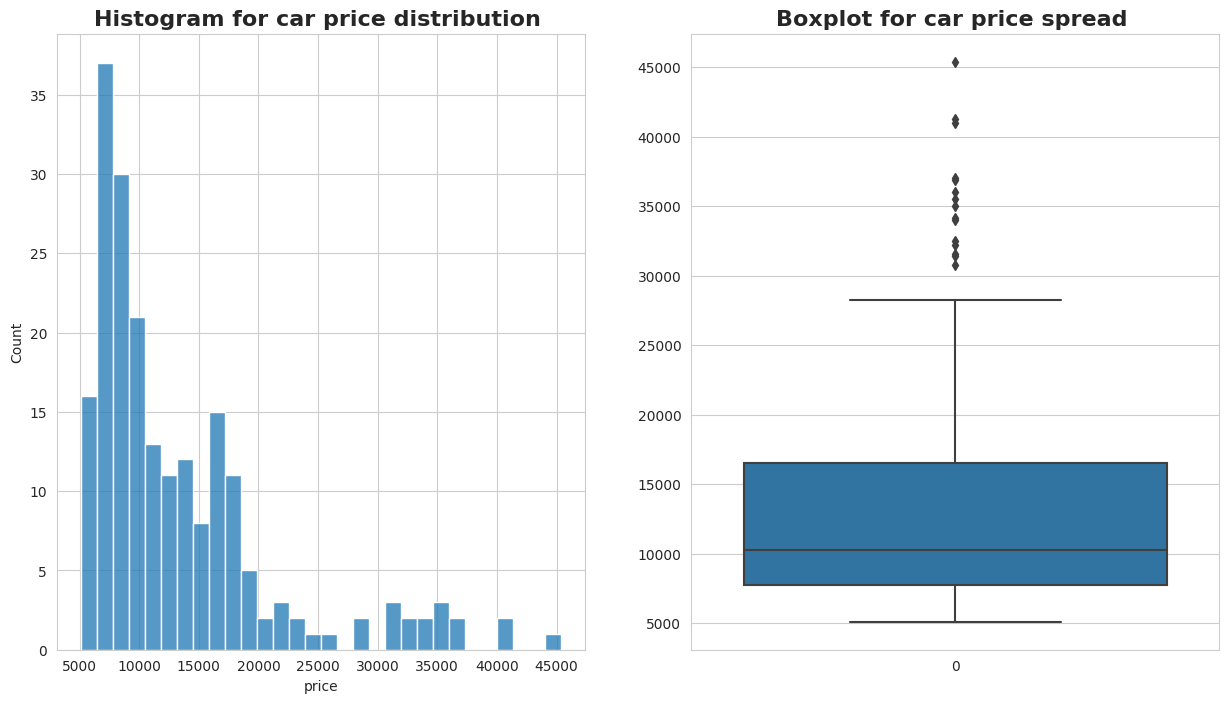

In [20]:
#Using Histogram to show us the the distribution of the car prices
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(df,x='price',bins=30)
plt.title('Histogram for car price distribution ',fontdict={'weight':'heavy','size':16})
#Using Boxplot to check the outliers in the price column
plt.subplot(1,2,2)
sns.boxplot(df['price'])
plt.title('Boxplot for car price spread ',fontdict={'weight':'heavy','size':16})
plt.show()

In [21]:
#Get the names of the numeric  columns in one list
numerical_values = df.select_dtypes(include=['int64','float64'])

num_col = []
for i in numerical_values:
  num_col.append(i)

print(num_col)
num_col.pop()

['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


'price'

In [22]:
#Apply function on the numeric colums to demonstrate the  relation between car prices and them.
def line_plot(col,df):
  plt.figure(figsize=(30,45))
  num = 1
  while num <= len(col):
    for i in col:
      plt.subplot(5,3,num)
      sns.scatterplot(df,x=i,y=df['price'],hue='CompanyName',s=150)
      plt.xlabel(i.upper(),fontdict=font)
      plt.ylabel('Car price'.upper(),fontdict=font)

      num+=1


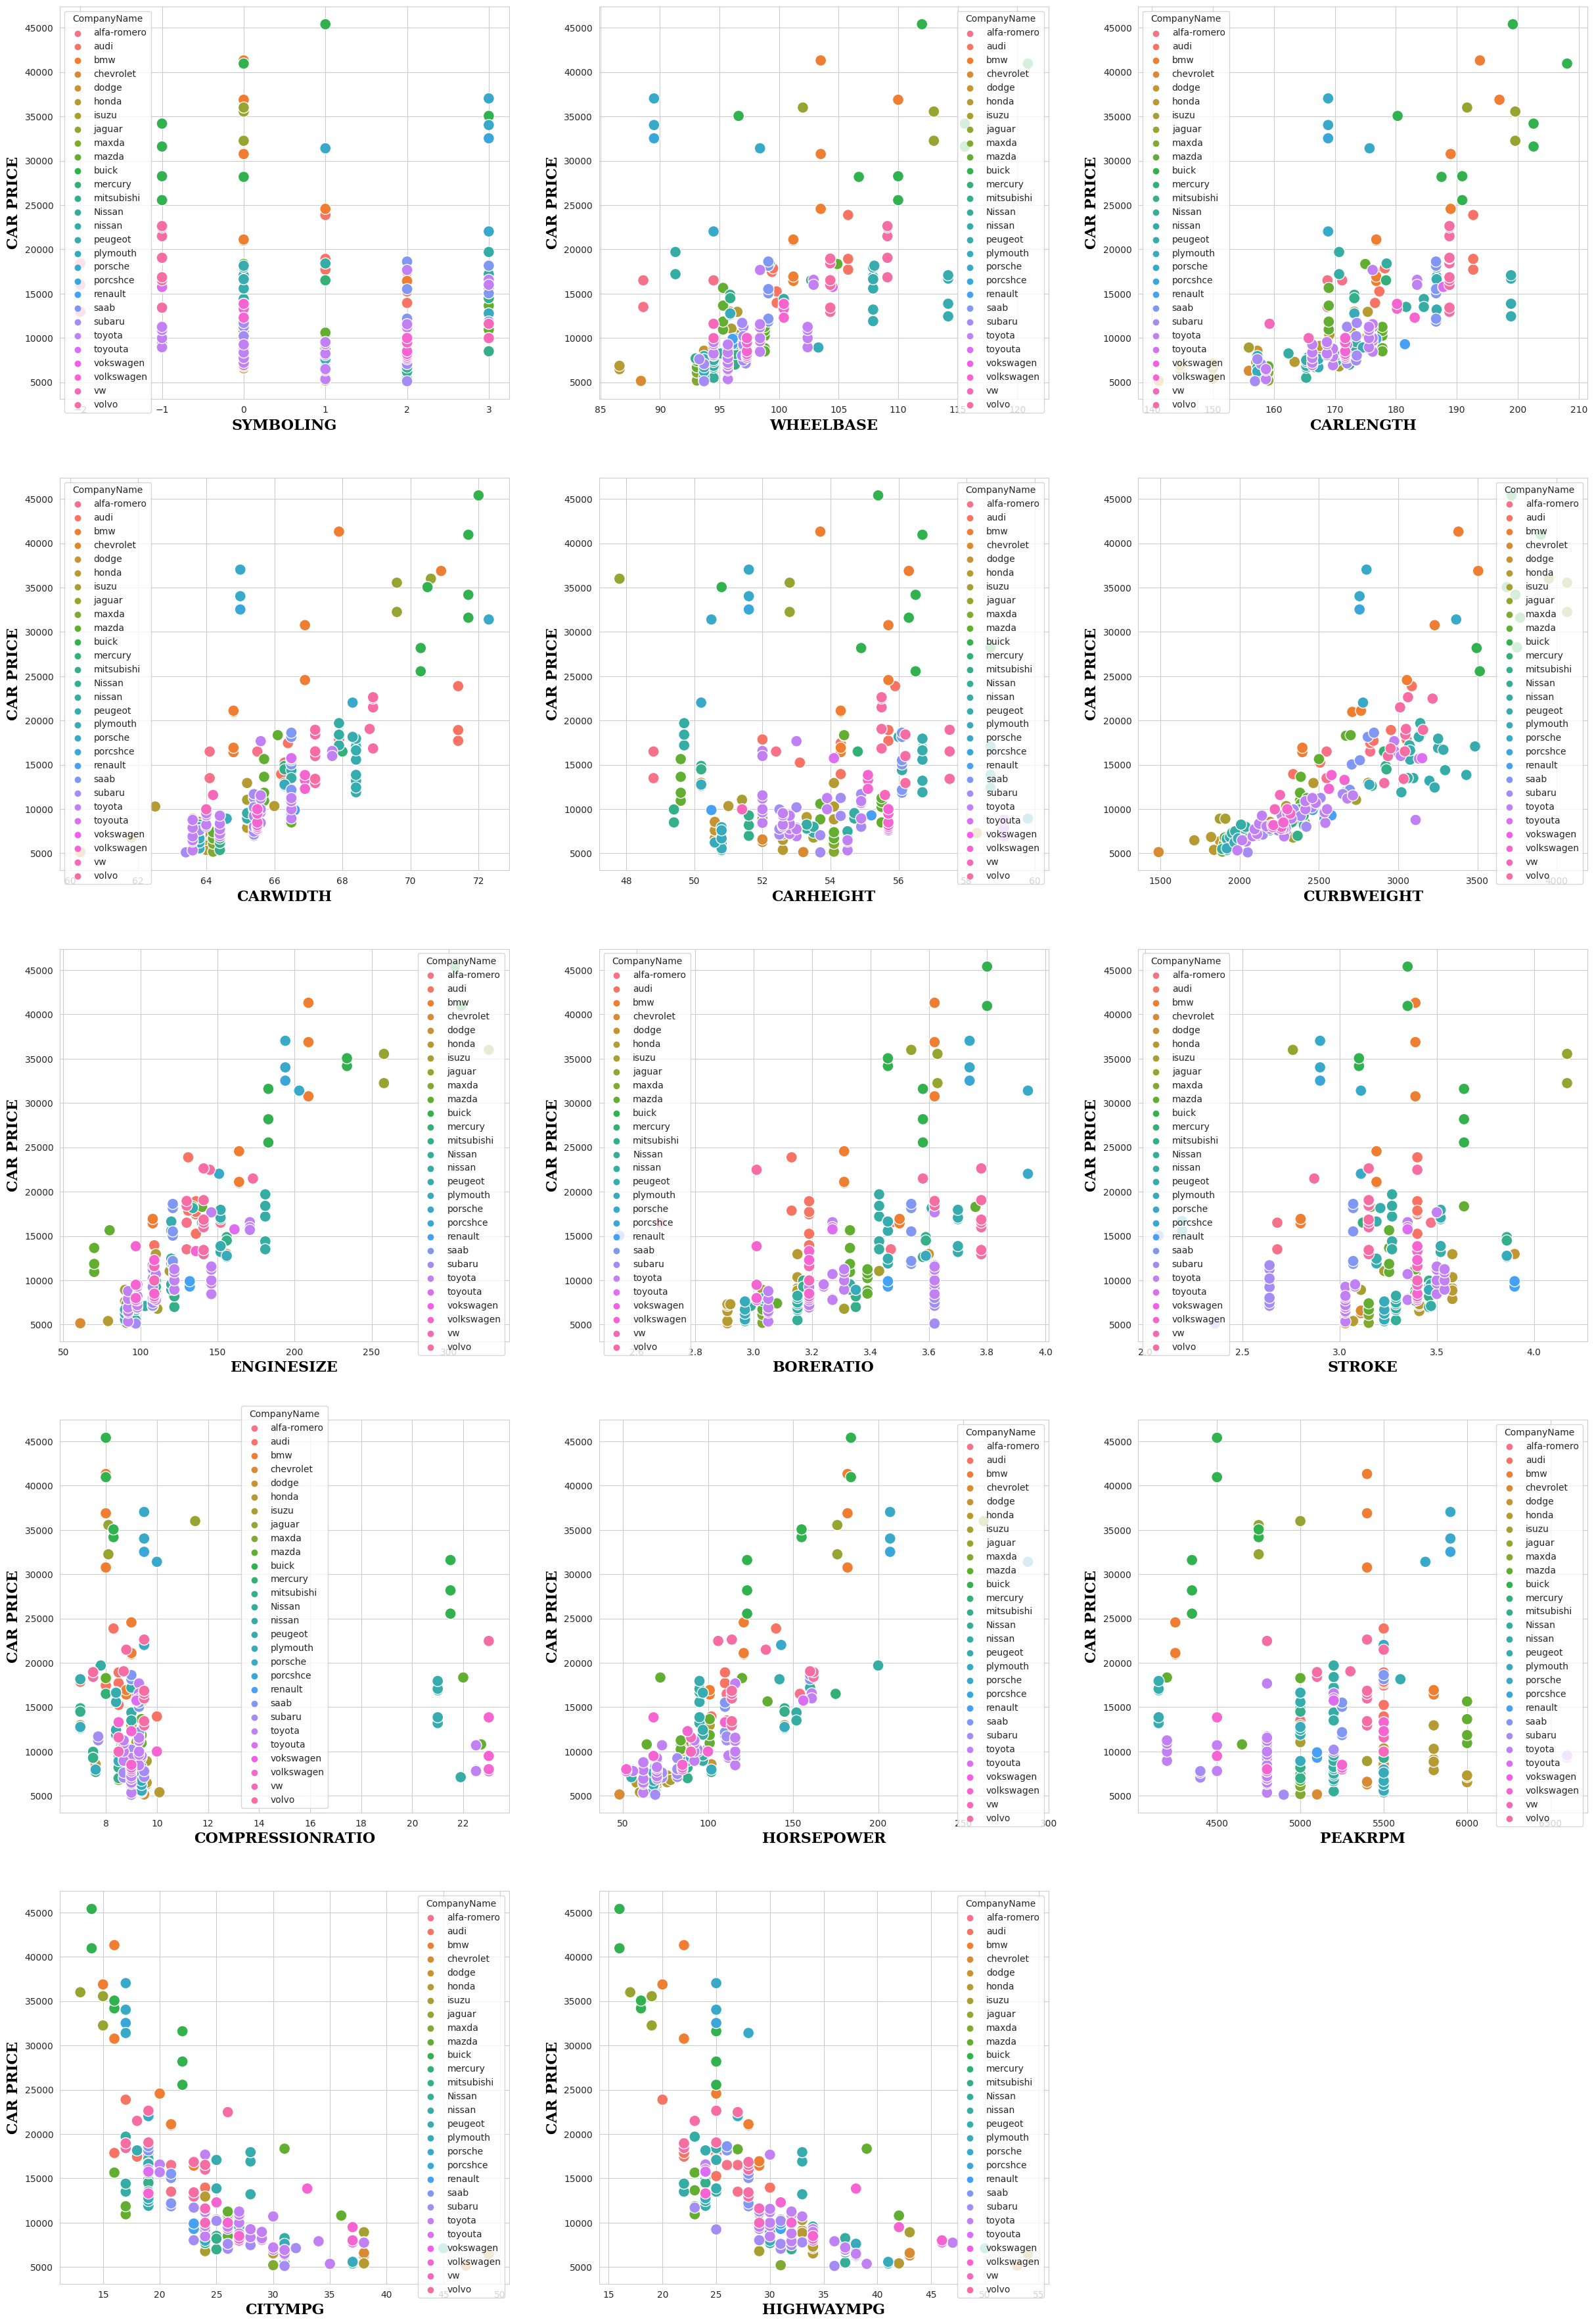

In [23]:
line_plot(num_col,df)

<ipython-input-24-f0c5dc7f4aec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


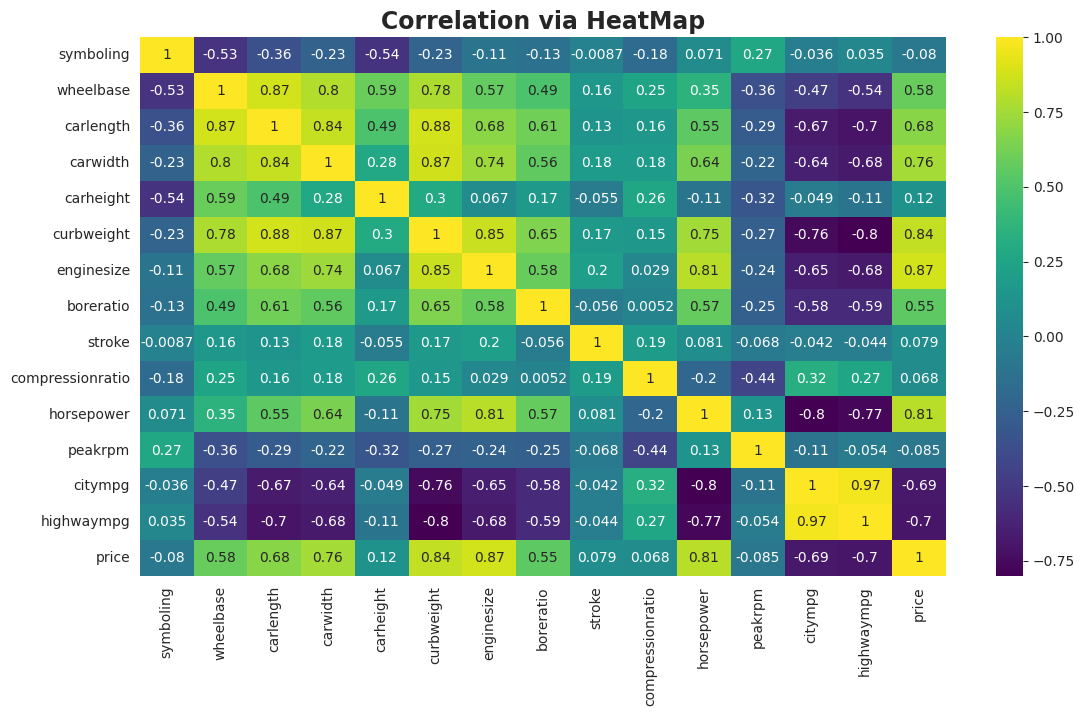

In [24]:
#Using Heatmap to bring the relation between numeric valuse to the light as below
corr = df.corr()
plt.figure(figsize=(13,7))
sns.heatmap(corr,annot=True,cmap='viridis')
plt.title("Correlation via HeatMap",fontdict={'weight':'heavy','size':17})
plt.show()

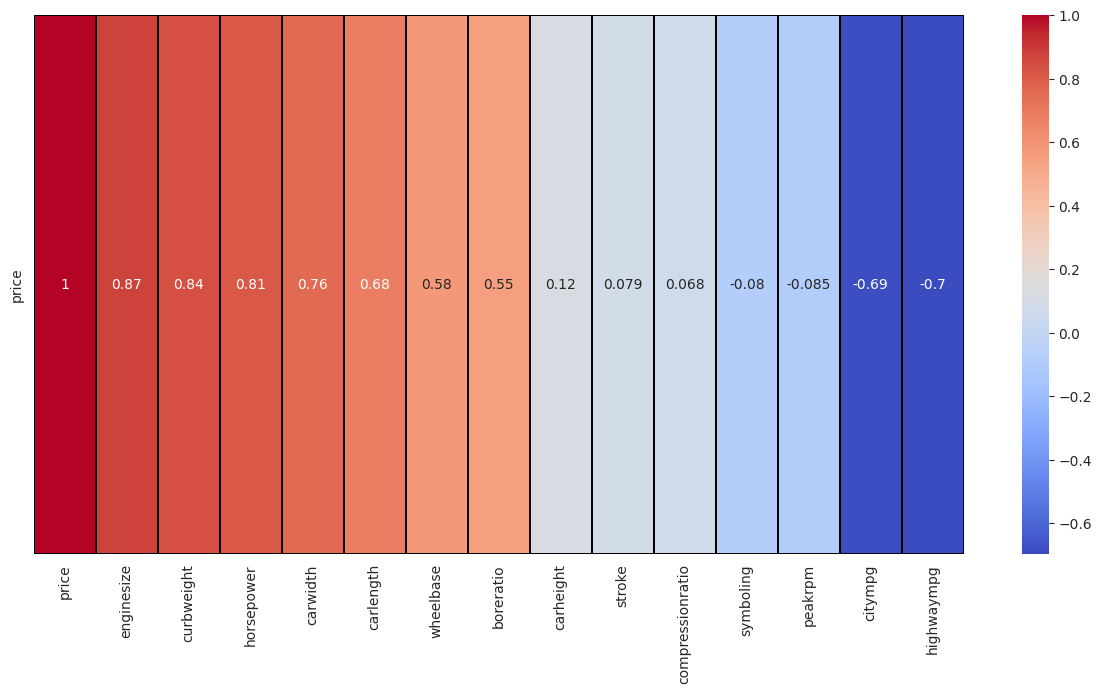

In [25]:
#Extact the price column
new_corr = corr.iloc[:,-1]
df_corr= pd.DataFrame({"price":new_corr})
#Make a heatmap to show us the  strength of the linear relationship between price and other numeric colums
final_corr = df_corr.sort_values(by='price',ascending=False)
plt.figure(figsize=(15,7))
sns.heatmap(final_corr.T,annot=True,cmap='coolwarm',linecolor='black',linewidths=0.08)
plt.show()

#Data Preprocessing

###Endcoding Process

In [26]:
#Applying list comprehension on doornumber column due to the ordinal relationship between variables
df['doornumber']=[2 if i == 'two' else 4 for i in df['doornumber']]
df['doornumber'].unique()

array([2, 4])

In [27]:
#Applying replace method on cylindernumber column due to the ordinal relationship between variables

df['cylindernumber'].replace(
    ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
    [4,6,5,3,12,2,8],
    inplace=True
)
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [28]:
#Make Function to apply one hot encoding on the columns
def get_dummy(col,df):
  df_col = pd.get_dummies(df[col],drop_first=True)
  df = pd.concat([df,df_col],axis=1)
  df.drop([col],axis=1,inplace=True)

  return df

In [29]:
#Applying the function on columns
df = get_dummy('fueltype',df)
df = get_dummy('aspiration',df)
df = get_dummy('carbody',df)
df = get_dummy('drivewheel',df)
df = get_dummy('enginelocation',df)
df = get_dummy('enginetype',df)
df = get_dummy('fuelsystem',df)


In [30]:
"""
After looking at our correlation heatmap, we can remove some features
which don't have a strong relationship with the price.

"""
df.drop(['CarName','CompanyName','symboling','stroke', 'compressionratio', 'horsepower','peakrpm','citympg','highwaympg'],axis=1,inplace=True)
df.head(1)

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,price,...,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,13495.0,...,0,0,0,0,0,0,0,1,0,0


###Splitting data into train,valid,test

In [31]:
#Splitting the data into x and y
x = df.drop(['price'],axis=1)
y=df[['price']]

In [32]:
#splitting the data into train,valid and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
print(x_train.shape)
print(x_test.shape)

(143, 31)
(62, 31)


###Data Scaling

In [34]:
#Applying scaling on data features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Linear Regression

In [35]:
#Building Model
lr = LinearRegression()
#train the model
lr.fit(x_train,y_train)


LinearRegression()

###Prediction and Evaluation

In [36]:
#Building our final model
y_pred = lr.predict(x_test)


In [37]:
# calculate Mean square error
MSE = mean_squared_error(y_test,y_pred)

# calculate ROOT Mean square error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

# calculate  Mean absolute error
MAE=mean_absolute_error(y_test, y_pred)

# Calculate R square vale
rsq = r2_score(y_test,y_pred)

print('mean squared error :',MSE)
print('Root mean squared error :',RMSE)
print('mean absolute error :',MAE)
print('r square :',rsq)

mean squared error : 12811049.06646031
Root mean squared error : 3579.252584892593
mean absolute error : 2403.3057082934806
r square : 0.8150946963335388


#Polynomial Regression

In [38]:
#Applying polynomial features on x (input) before building the model
poly_reg = PolynomialFeatures(degree=3)

x_train = poly_reg.fit_transform(x_train)
x_test = poly_reg.transform(x_test)


In [39]:
#Model building
lin_poly = LinearRegression()
#Train the model
lin_poly.fit(x_train,y_train)

LinearRegression()

###Prediction and Evaluation

In [40]:
#Building our final model
y_pred = lin_poly.predict(x_test)


In [41]:
# calculate Mean square error
MSE = mean_squared_error(y_test,y_pred)

# calculate ROOT Mean square error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

# calculate  Mean absolute error
MAE=mean_absolute_error(y_test, y_pred)

# Calculate R square vale
rsq = r2_score(y_test,y_pred)

print('mean squared error :',MSE)
print('Root mean squared error :',RMSE)
print('mean absolute error :',MAE)
print('r square :',rsq)

mean squared error : 3.0978623290954434e+28
Root mean squared error : 176007452373342.53
mean absolute error : 26746038156094.645
r square : -4.471227701234238e+20


In [ ]:
"""
are these results from polynomial model nomal ?
if they aren't , could you please write the reason in the comment section ?
Thanks in advance.

"""